In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ExcelFile = "SALIDASIMULACION_vf.xlsx"

In [17]:
#este es un ejemplo de leer solo una cartera, en el excel las carteras están denominadas 0,1,...,n.. 
#por ahora n=4 es la más agresiva
CarteraALeer = 0 
#leo excel 
df = pd.read_excel(ExcelFile,CarteraALeer)

In [18]:
#head de matriz de retornos acumulados
df.head()

,0.025,0.05,0.075,0.1,0.125,0.15,0.175,0.2,0.225,0.25,...,0.75,0.775,0.8,0.825,0.85,0.875,0.9,0.925,0.95,0.975
0,0.970604,0.980834,0.982912,0.984534,0.990977,0.991468,0.992541,0.994607,0.997445,0.997680,...,1.015064,1.015418,1.016377,1.017435,1.019071,1.020354,1.021677,1.022580,1.027144,1.029057
1,0.956721,0.971041,0.978773,0.983332,0.986455,0.989299,0.991920,0.994094,0.996183,0.997914,...,1.023875,1.025308,1.027007,1.028754,1.030521,1.032538,1.035098,1.038100,1.042472,1.048905
2,0.953133,0.965997,0.974612,0.980412,0.984902,0.988573,0.991737,0.994432,0.996985,0.999178,...,1.032450,1.034259,1.036271,1.038476,1.040876,1.043612,1.046698,1.050405,1.055293,1.063465
3,0.950456,0.963786,0.972754,0.979002,0.984181,0.988391,0.991992,0.995198,0.998085,1.000747,...,1.040433,1.042700,1.045091,1.047678,1.050444,1.053609,1.057371,1.061741,1.067813,1.076885
4,0.948054,0.962604,0.971768,0.978911,0.984368,0.988945,0.992984,0.996710,0.999916,1.002966,...,1.047950,1.050436,1.053122,1.056189,1.059493,1.063245,1.067326,1.072400,1.079119,1.089323


In [19]:
# Elijo ciertas columnas
ColumnasElegidas = [0.05,0.225,0.4,0.675,0.95]
df = df.loc[:,ColumnasElegidas].copy()

In [20]:
#cambio nombres de columnas a idioma humano
NuevosNombresColumnas = ["Muy Pesimista","Pesimista","Esperado","Optimista","Muy Optimista"]
col_rename_dict = {i:j for i,j in zip(ColumnasElegidas,NuevosNombresColumnas)}
df.rename(columns=col_rename_dict, inplace=True)


In [21]:
#asi quedan en idioma humano
df.head()

,Muy Pesimista,Pesimista,Esperado,Optimista,Muy Optimista
0,0.980834,0.997445,1.002281,1.012333,1.027144
1,0.971041,0.996183,1.006284,1.019810,1.042472
2,0.965997,0.996985,1.010140,1.027320,1.055293
3,0.963786,0.998085,1.013968,1.034222,1.067813
4,0.962604,0.999916,1.017627,1.040925,1.079119


In [22]:
#agrego el primer periodo (el tiempo cero) en la matriz de rentabilidades porque el excel no los trae, simplemente agrega 
#una columna nueva en la primera ocasión
df.loc[-1,:]=1
df.index = df.index+1
df.sort_index(inplace=True) 

In [23]:
#asi queda...
df.head()

,Muy Pesimista,Pesimista,Esperado,Optimista,Muy Optimista
0,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.980834,0.997445,1.002281,1.012333,1.027144
2,0.971041,0.996183,1.006284,1.019810,1.042472
3,0.965997,0.996985,1.010140,1.027320,1.055293
4,0.963786,0.998085,1.013968,1.034222,1.067813


In [24]:
#variables principales
InversionMensual = 10000
InversionInicial = 1000000

In [25]:
#dataframe de rentabilidades no acumuladas, no es necesario, pero para claridad es mejor tenerlo
rentabilidades = (df/df.shift(1)).fillna(1)
rentabilidades.head()

,Muy Pesimista,Pesimista,Esperado,Optimista,Muy Optimista
0,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.980834,0.997445,1.002281,1.012333,1.027144
2,0.990015,0.998734,1.003993,1.007387,1.014923
3,0.994805,1.000806,1.003833,1.007364,1.012299
4,0.997712,1.001103,1.003789,1.006718,1.011863


In [26]:
#creo un dataframe separado df_vf que tiene los valores futuros (en $)
df_vf=df.copy()
df_vf.loc[:,:]=0

In [27]:
#fijo que en el periodo 0 el inversionista tiene el Inicial
df_vf.loc[0,:]=InversionInicial

# genero el resto de los periodos de manera recursiva (no elegante)
# valor futuro (i)  = valor futuro (i-1) * rentabilidad no acumulada (i) + InversionInicial
for i in range(1,len(df)):
    for columna in range(len(ColumnasElegidas)):
        df_vf.iloc[i,columna] = df_vf.iloc[i-1,columna]*rentabilidades.iloc[i,columna]+InversionMensual

In [28]:
#chan!
df_vf.head().applymap("${0:.2f}".format)

,Muy Pesimista,Pesimista,Esperado,Optimista,Muy Optimista
0,$1000000.00,$1000000.00,$1000000.00,$1000000.00,$1000000.00
1,$990834.12,$1007445.39,$1012281.46,$1022332.60,$1037144.26
2,$990940.84,$1016170.28,$1026323.44,$1039884.06,$1062621.45
3,$995793.34,$1026988.91,$1040256.94,$1057541.99,$1085690.45
4,$1003514.85,$1038121.87,$1054198.50,$1074646.36,$1108570.24


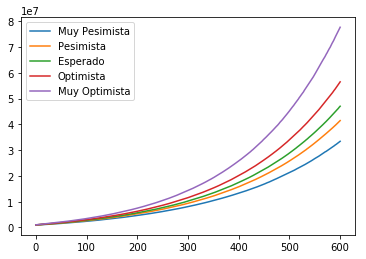

In [29]:
#graficamente (este es el output para el portfolio 0)
df_vf.plot()

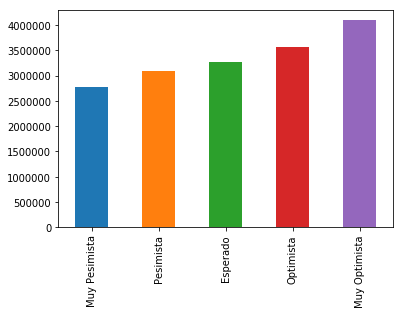

In [34]:
# cuanta plata va a tener nuestro amigo en 10 años (o n = 120 meses)

df_vf.iloc[120,:].plot(kind="bar")